This is the given problem.

<img src="book2_img1.png">

On solving above question we recieve this posterior distribution.

<img src="book2_img2.png">

We know that in Gibbs sampling we keep all other parameter constant in posterior distribution, while determing the distribution other parameter.

<img src="book2_img3.png">

In [2]:
update_mu = function(n, ybar, sig2, mu_0, sig2_0){
    sig2_1 = 1.0/(n/sig2_0 + 1.0/sig2_0)
    mu_1 = sig2_1 * (n*ybar + mu_0/sig2_0)
    
    return (rnorm(n=1, mean = mu_1, sd = sig2_1))
}

<img src="book2_img4.png">

In [3]:
update_sig2 = function(n, y, mu, nu_0, beta_0){
    nu_1 = nu_0 + n/2.0
    beta_1 = beta_0 + 0.5*(sum((y-mu)^2))
    
    return (1.0/rgamma(n=1, shape = nu_1, rate = beta_1))
}

In [14]:
gibbs = function(y, n_iter, init, prior) {
  ybar = mean(y)
  n = length(y)
  
  ## initialize
  mu_out = numeric(n_iter)
  sig2_out = numeric(n_iter)
  
  mu_now = init$mu
  
  ## Gibbs sampler
  for (i in 1:n_iter) {
    sig2_now = update_sig2(n=n, y=y, mu=mu_now, nu_0=prior$nu_0, beta_0=prior$beta_0)
    mu_now = update_mu(n=n, ybar=ybar, sig2=sig2_now, mu_0=prior$mu_0, sig2_0=prior$sig2_0)
    
    sig2_out[i] = sig2_now
    mu_out[i] = mu_now
  }
  
  cbind(mu=mu_out, sig2=sig2_out)
}

In [15]:
y = c(1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9)
ybar = mean(y)
n = length(y)

In [16]:
prior = list()

prior$mu_0 = 0.0
prior$sig2_0 = 1.0

prior$n_0 = 2.0
prior$s2_0 = 10

prior$nu_0 = prior$n_0/2.0
prior$beta_0 = prior$n_0 * prior$s2_0/2.0

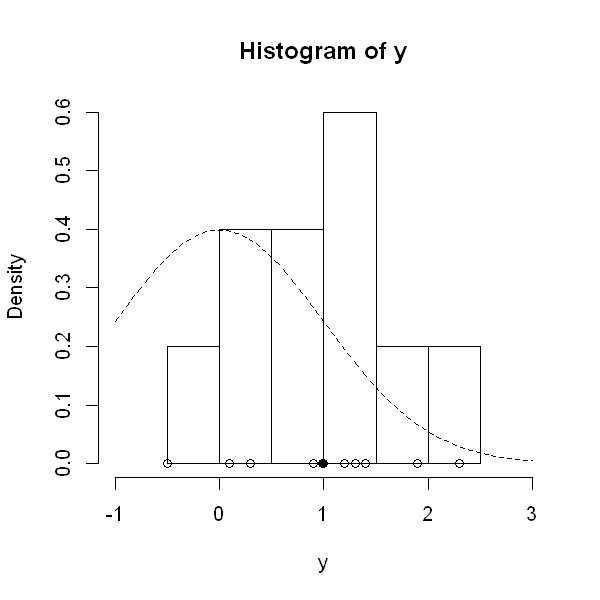

In [17]:
options(repr.plot.width = 5, repr.plot.height = 5)

hist(y, freq=FALSE, xlim=c(-1.0, 3.0)) # histogram of the data
curve(dnorm(x=x, mean=prior$mu_0, sd=sqrt(prior$sig2_0)), lty=2, add=TRUE) # prior for mu
points(y, rep(0,n), pch=1) # individual data points
points(ybar, 0, pch=19) # sample mean

In [18]:
set.seed(53)

init = list()
init$mu = 0.0

post = gibbs(y=y, n_iter=1e3, init=init, prior=prior)

In [19]:
print(head(post))
print(tail(post))

            mu     sig2
[1,] 0.7785881 3.023284
[2,] 0.7631336 1.884186
[3,] 0.7427572 3.547209
[4,] 0.9703840 2.415509
[5,] 0.9288741 2.586753
[6,] 0.9806420 2.504604
               mu     sig2
 [995,] 0.8375700 1.736691
 [996,] 0.9144433 2.303617
 [997,] 0.8423144 1.466177
 [998,] 0.9098853 2.580635
 [999,] 0.8978522 2.585413
[1000,] 0.9105273 2.843730


In [21]:
library("coda")

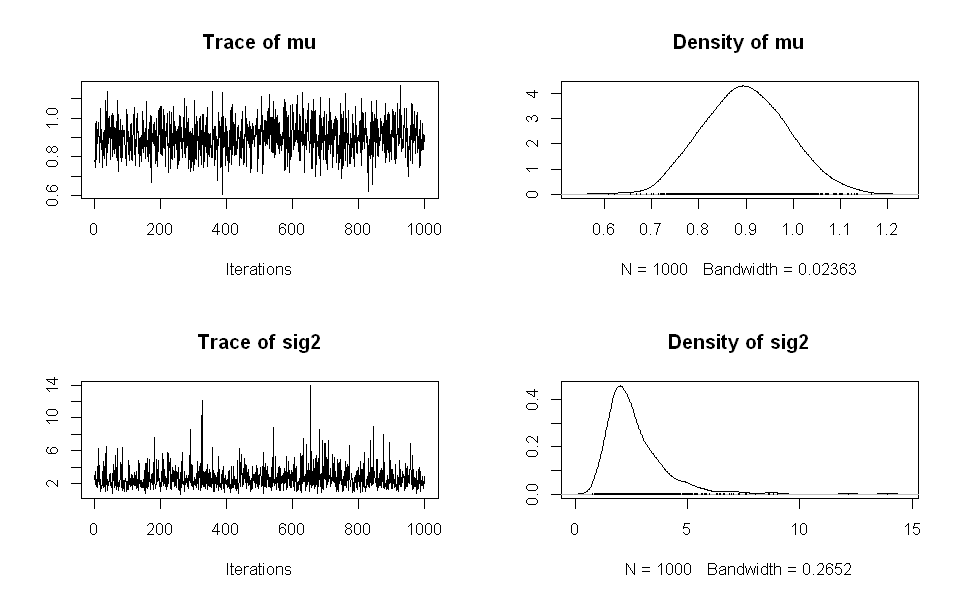

In [23]:
options(repr.plot.width = 8, repr.plot.height = 5)

plot(as.mcmc(post))

In [24]:
summary(as.mcmc(post))


Iterations = 1:1000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

       Mean      SD Naive SE Time-series SE
mu   0.8995 0.08874 0.002806       0.002806
sig2 2.6512 1.32559 0.041919       0.041919

2. Quantiles for each variable:

       2.5%    25%    50%    75% 97.5%
mu   0.7389 0.8383 0.8977 0.9597 1.075
sig2 1.0833 1.8068 2.3212 3.1414 5.982
